In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime


# ChromeDriver 경로 설정 (사용자의 환경에 맞게 수정)
chrome_driver_path = "./chromedriver-win64/chromedriver-win64/chromedriver.exe"

# Chrome 옵션 설정
chrome_options = Options()
chrome_options.add_argument("--headless")  # 창을 표시하지 않음
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--window-size=1920x1080")  # 화면 크기 설정

# ChromeDriver 서비스 설정
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # 페이지 이동
    url = "https://upbit.com/full_chart?code=CRIX.UPBIT.KRW-BTC"
    driver.get(url)

    # 페이지가 완전히 로드될 때까지 대기
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//*[@id='fullChartiq']")))
    time.sleep(5)  # 추가 대기 시간

    # 첫 번째 메뉴 버튼 클릭
    menu_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//*[@id='fullChartiq']/div/div/div[1]/div/div/cq-menu[1]/span/cq-clickable"))
    )
    menu_button.click()
    time.sleep(1)  # 클릭 후 잠시 대기

    # "4시간" 차트 클릭 및 캡처
    four_hour_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//*[@id='fullChartiq']/div/div/div[1]/div/div/cq-menu[1]/cq-menu-dropdown/cq-item[9]"))
    )
    four_hour_button.click()
    time.sleep(2)  # 데이터 로딩 시간 대기
    
    # 현재 날짜와 시간을 기준으로 파일 이름에 형식 추가
    current_time = datetime.now().strftime("%m%d_%H")
    
    screenshot_path_4h = f"{current_time}_upbit_full_chart_4hour.png"
    driver.save_screenshot(screenshot_path_4h)
    print(f"4시간 차트 스크린샷이 저장되었습니다: {screenshot_path_4h}")

    # "1시간" 차트 클릭 및 캡처
    menu_button.click()  # 메뉴 버튼 다시 클릭
    time.sleep(1)  # 클릭 후 잠시 대기
    one_hour_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//*[@id='fullChartiq']/div/div/div[1]/div/div/cq-menu[1]/cq-menu-dropdown/cq-item[8]"))
    )
    one_hour_button.click()
    time.sleep(2)  # 데이터 로딩 시간 대기
    screenshot_path_1h = f"{current_time}_upbit_full_chart_1hour.png"
    driver.save_screenshot(screenshot_path_1h)
    print(f"1시간 차트 스크린샷이 저장되었습니다: {screenshot_path_1h}")


finally:
    # 드라이버 종료
    driver.quit()

4시간 차트 스크린샷이 저장되었습니다: 1104_14_upbit_full_chart_4hour.png
1시간 차트 스크린샷이 저장되었습니다: 1104_14_upbit_full_chart_1hour.png


In [3]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("TEST_MultiModal_Agent")

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16


LangSmith 추적을 시작합니다.
[프로젝트명]
TEST_MultiModal_Agent


In [ ]:
# from langchain_openai import ChatOpenAI
# from langchain_teddynote.models import MultiModal


# system_prompt = """당신은 비트코인 차트를 해석하는 시각적 패턴 분석 전문가입니다.
# 당신의 임무는 주어진 차트 이미지를 기반으로 주요 시각적 패턴과 거래 심리를 분석하여 사용자가 매수, 매도, 보류 중 하나의 결정을 내릴 수 있도록 도움을 주는 것입니다.

# 분석해야 할 항목은 다음과 같습니다:
# 1. 주요 차트 패턴 식별:
#    - 특정 추세의 전환을 예고할 수 있는 시각적 패턴을 탐지합니다. 예를 들어, 상승 또는 하락 추세 끝에서 나타나는 헤드 앤 숄더 및 역 헤드 앤 숄더, 상승 및 하락 반전 신호를 주는 이중 바닥/이중 천장, 지속형 패턴으로 사용되는 삼각형 패턴(상승, 하락, 대칭), 단기 조정 후 지속되는 깃발 패턴 등을 탐지하세요.
# 2. 거래량 스파이크와 시장 심리 분석:
#    - 특정 시점에서 거래량이 급증한 부분을 찾아내어 시장 참여자들의 심리적 변화를 평가하세요. 예를 들어, 급격한 거래량 증가는 새로운 추세의 시작을 의미하거나 큰 시장 참여자들이 포지션을 조정하는 신호일 수 있습니다.
# 3. 캔들스틱 반전 패턴 탐지:
#    - 반전 신호로 자주 사용되는 특정 캔들 패턴을 탐지하세요. 예를 들어, 핀바(Pin Bar)는 강한 매도/매수 반전을 나타내며, 엔골핑(Engulfing) 패턴은 강력한 추세 전환 신호로 해석될 수 있습니다. 이러한 패턴들은 특정 구간에서 매수/매도 압력의 변화를 보여줍니다.
# 4. 추세의 시각적 흐름과 돌파 분석:
#    - 차트의 시각적 흐름을 분석하여 현재 추세가 유지되는지, 또는 변환될 가능성이 있는지 확인하세요. 예를 들어, 추세선 돌파가 예상되는 구간이나 강한 저항선/지지선 근처의 움직임을 주의 깊게 관찰하여 추세 전환의 가능성을 평가하세요.

# 분석 결과를 다음 JSON 형식으로 제공해주세요:
# {{
#     "decision": "BUY 또는 SELL 또는 HOLD 중 하나로만 작성",
#     "summary": "시장 분석 및 예측 내용을 상세히 서술. 투자 결정을 제안하고 해당 이유를 서술",
# }}

# 주의사항:
# - decision은 반드시 BUY 또는 SELL 또는 HOLD 중 하나여야 합니다.
# - summary는 현재 시장 상황과 향후 전망을 포함해야 하며, 투자 결정을 제안하고 해당 이유를 서술해야 합니다.
# """

# user_prompt = """당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 주요 시각적 패턴, 거래량 스파이크, 캔들스틱 반전 패턴, 추세의 시각적 흐름을 분석하고, 향후 4시간 내의 가격 예측 및 이에 따른 투자 전략을 JSON 형식으로 제안하세요."""

# # 멀티모달 객체 생성
# multimodal_llm_with_prompt = MultiModal(
#     llm, system_prompt=system_prompt, user_prompt=user_prompt
# )


# # 이미지 파일로 부터 질의
# answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

# answer

In [23]:
from langchain_core.pydantic_v1 import BaseModel
from typing import Annotated, TypedDict, Optional, Literal, Tuple, Optional, Dict, Any
from langgraph.graph.message import add_messages

# State 정의
class State(BaseModel):
    messages: Annotated[list, add_messages]
    # fng: Optional[dict] = None
    # news_search: Optional[dict] = None
    # quant: Optional[dict] = None
    image: Optional[dict] = None
    # master: Optional[dict] = None

In [24]:
# 분석 결과를 위한 Pydantic 모델
class ImageAnalysisResult(BaseModel):
    decision: Literal["BUY", "SELL", "HOLD"]
    summary: str

In [25]:
# 프롬프트 템플릿 설정
image_analysis_template = """당신은 비트코인 차트를 해석하는 시각적 패턴 분석 전문가입니다.
 당신의 임무는 주어진 차트 이미지를 기반으로 주요 시각적 패턴과 거래 심리를 분석하여 사용자가 매수, 매도, 보류 중 하나의 결정을 내릴 수 있도록 도움을 주는 것입니다.

 분석해야 할 항목은 다음과 같습니다:
 1. 주요 차트 패턴 식별:
    - 특정 추세의 전환을 예고할 수 있는 시각적 패턴을 탐지합니다. 예를 들어, 상승 또는 하락 추세 끝에서 나타나는 헤드 앤 숄더 및 역 헤드 앤 숄더, 상승 및 하락 반전 신호를 주는 이중 바닥/이중 천장, 지속형 패턴으로 사용되는 삼각형 패턴(상승, 하락, 대칭), 단기 조정 후 지속되는 깃발 패턴 등을 탐지하세요.
 2. 거래량 스파이크와 시장 심리 분석:
    - 특정 시점에서 거래량이 급증한 부분을 찾아내어 시장 참여자들의 심리적 변화를 평가하세요. 예를 들어, 급격한 거래량 증가는 새로운 추세의 시작을 의미하거나 큰 시장 참여자들이 포지션을 조정하는 신호일 수 있습니다.
 3. 캔들스틱 반전 패턴 탐지:
    - 반전 신호로 자주 사용되는 특정 캔들 패턴을 탐지하세요. 예를 들어, 핀바(Pin Bar)는 강한 매도/매수 반전을 나타내며, 엔골핑(Engulfing) 패턴은 강력한 추세 전환 신호로 해석될 수 있습니다. 이러한 패턴들은 특정 구간에서 매수/매도 압력의 변화를 보여줍니다.
 4. 추세의 시각적 흐름과 돌파 분석:
    - 차트의 시각적 흐름을 분석하여 현재 추세가 유지되는지, 또는 변환될 가능성이 있는지 확인하세요. 예를 들어, 추세선 돌파가 예상되는 구간이나 강한 저항선/지지선 근처의 움직임을 주의 깊게 관찰하여 추세 전환의 가능성을 평가하세요.

 분석 결과를 다음 JSON 형식으로 제공해주세요:
 {{
     "decision": "BUY 또는 SELL 또는 HOLD 중 하나로만 작성",
     "summary": "시장 분석 및 예측 내용을 상세히 서술. 투자 결정을 제안하고 해당 이유를 서술",
 }}
 """


In [26]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.0,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

In [29]:
from langchain_core.prompts import PromptTemplate
from langchain_teddynote.models import MultiModal
from langchain_core.output_parsers import JsonOutputParser

# PromptTemplate 및 JSON OutputParser 설정
image_prompt_template = PromptTemplate.from_template(image_analysis_template)
image_output_parser = JsonOutputParser(pydantic_object=ImageAnalysisResult)

# MultiModal 객체 생성
multimodal = MultiModal(
    model=llm,
    system_prompt=image_analysis_template,
    user_prompt="""당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 주요 시각적 패턴, 거래량 스파이크, 캔들스틱 반전 패턴, 추세의 시각적 흐름을 분석하고, 향후 4시간 내의 가격 예측 및 이에 따른 투자 전략을 JSON 형식으로 제안하세요."""
)

# chart_analysis_chain = image_prompt_template | multimodal



def multimodal_agent_state(state: State, image_path: str) -> State:
    try:
        # 이미지를 통해 분석 수행
        result = multimodal.invoke(image_path)
        
        # JSON 파서를 통해 결과 파싱
        parsed_result = image_output_parser.parse(result)

        # dict로 반환될 경우 Pydantic 모델 객체로 변환
        if isinstance(parsed_result, dict):
            parsed_result = ImageAnalysisResult(**parsed_result)
        
        # 새로운 메시지 생성 및 상태 업데이트
        new_message = f"Decision: {parsed_result.decision}, Summary: {parsed_result.summary}"
        updated_messages = state.messages + [new_message]
        
        # 상태 업데이트 후 반환
        return state.copy(update={
            "messages": updated_messages,
            "multimodal": {
                "decision": parsed_result.decision,
                "summary": parsed_result.summary
            }
        })
    except Exception as e:
        print(f"Error in multimodal_agent_state: {e}")
        return state




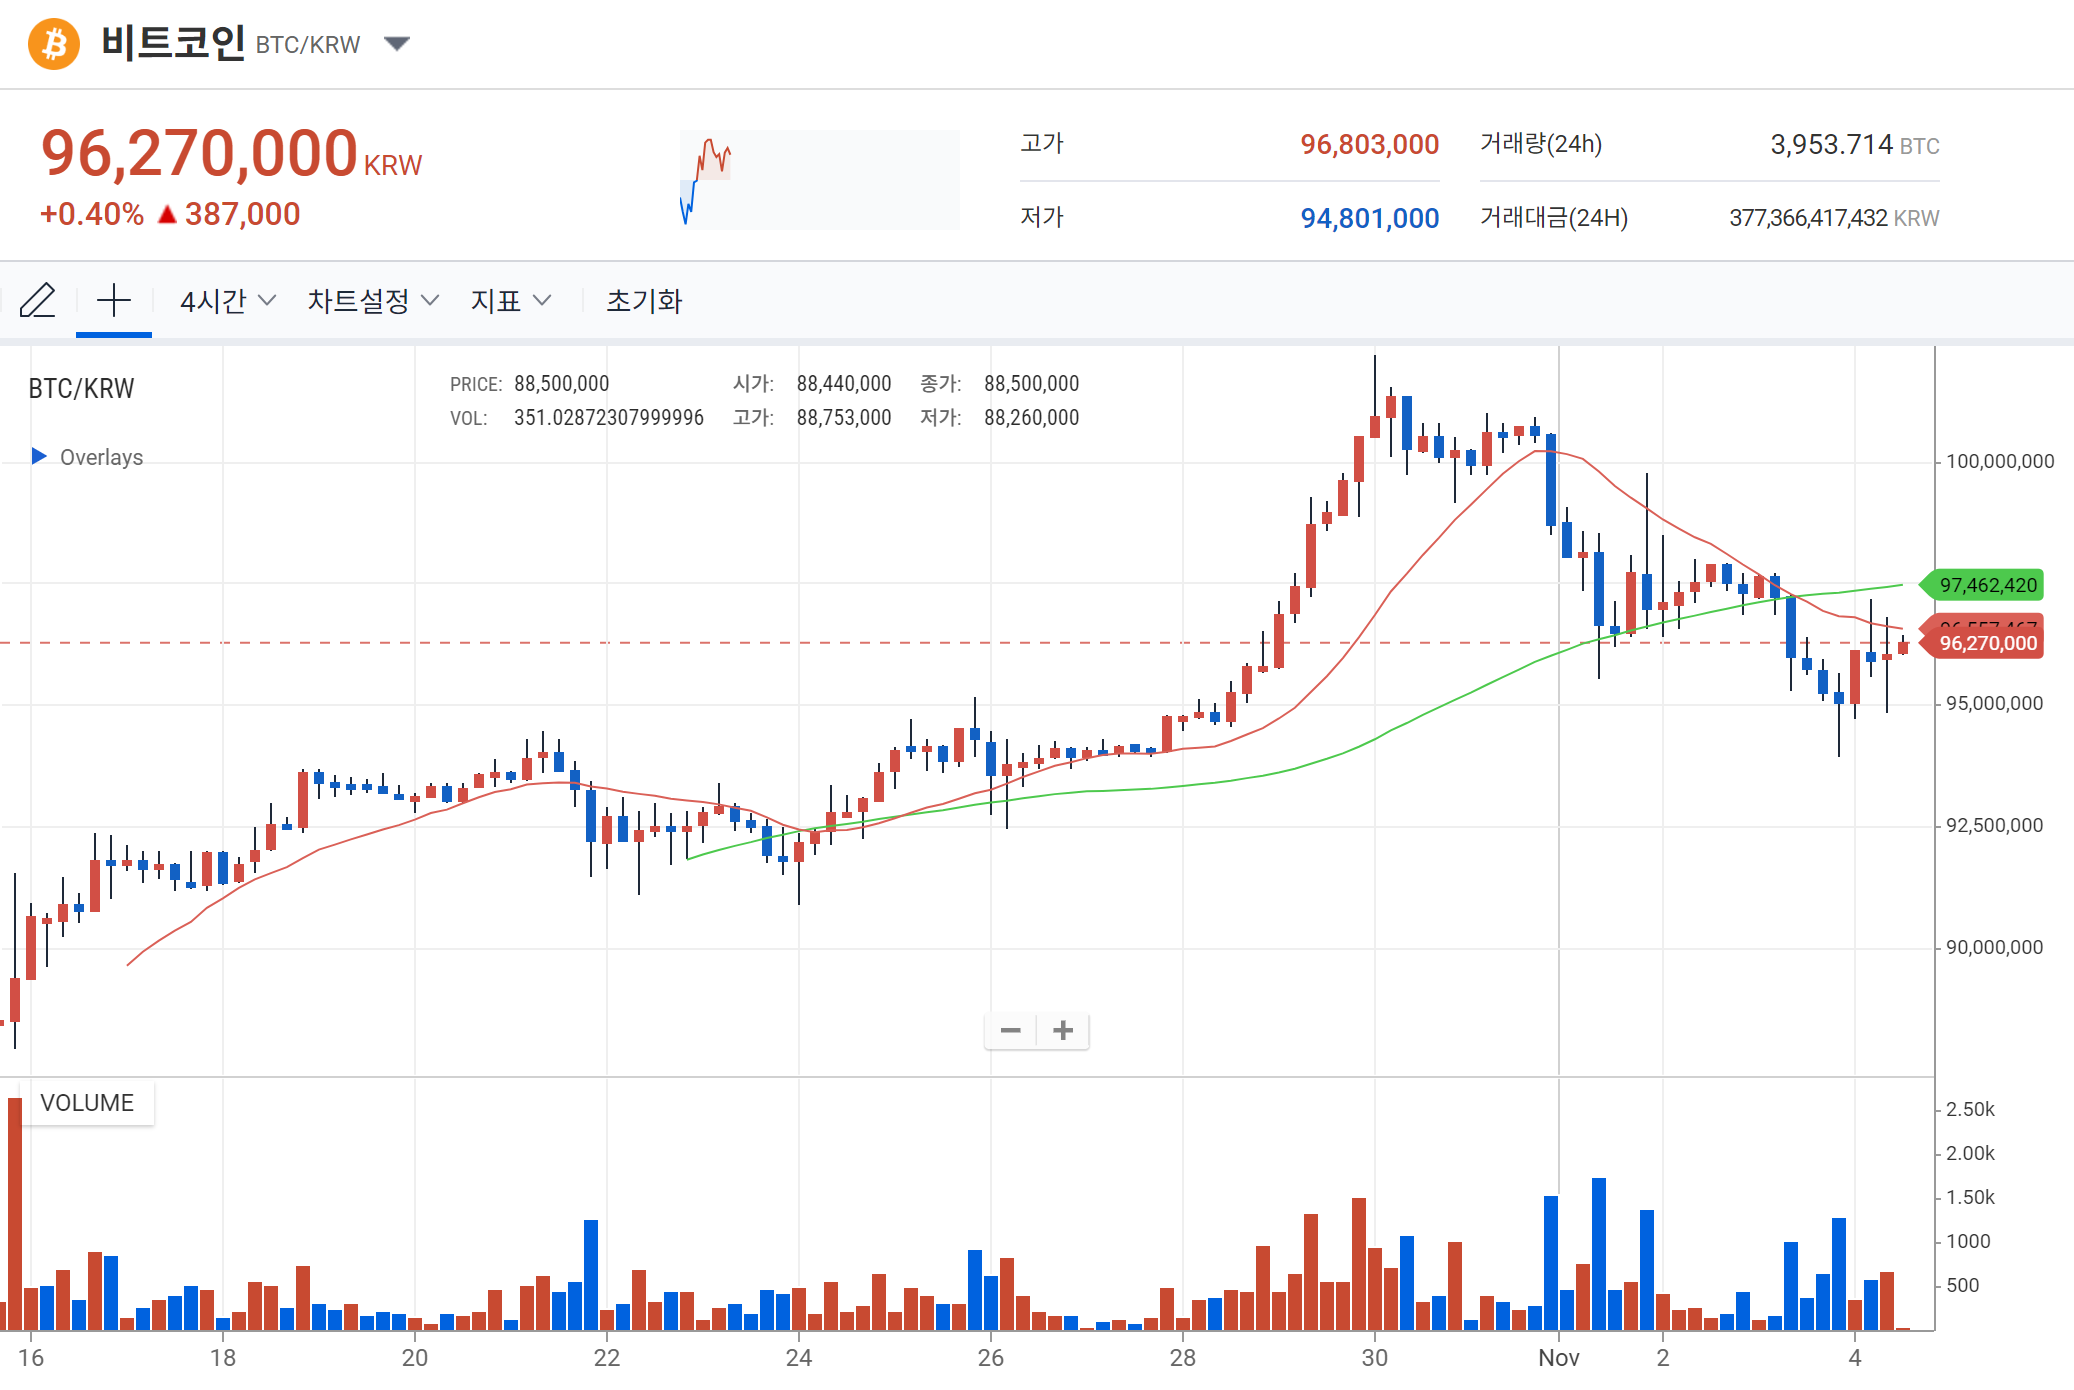

Updated Messages: ['Decision: HOLD, Summary: 현재 비트코인 차트에서는 최근 하락세 이후 약간의 반등이 나타나고 있습니다. 거래량은 비교적 안정적이며, 큰 스파이크는 보이지 않습니다. 캔들스틱 패턴에서는 명확한 반전 신호가 나타나지 않았습니다. 이동 평균선이 교차하는 지점에서 가격이 머물고 있어, 추세 전환의 가능성을 주의 깊게 살펴볼 필요가 있습니다. 따라서, 명확한 추세가 형성될 때까지 관망하는 것이 좋습니다.']
Multimodal Analysis Result: {'decision': 'HOLD', 'summary': '현재 비트코인 차트에서는 최근 하락세 이후 약간의 반등이 나타나고 있습니다. 거래량은 비교적 안정적이며, 큰 스파이크는 보이지 않습니다. 캔들스틱 패턴에서는 명확한 반전 신호가 나타나지 않았습니다. 이동 평균선이 교차하는 지점에서 가격이 머물고 있어, 추세 전환의 가능성을 주의 깊게 살펴볼 필요가 있습니다. 따라서, 명확한 추세가 형성될 때까지 관망하는 것이 좋습니다.'}


In [30]:
# 초기 State 객체 생성 (이미지 경로는 인자로 전달)
initial_state = State(messages=[])

# 이미지 파일 경로
IMAGE_PATH_FROM_FILE = "./1104_13_upbit_full_chart_4hour.png"

# 분석 수행 및 결과 출력
updated_state = multimodal_agent_state(initial_state, IMAGE_PATH_FROM_FILE)
if updated_state:
    print(f"Updated Messages: {updated_state.messages}")
    print(f"Multimodal Analysis Result: {updated_state.multimodal}")